In [1]:
import json
import pandas as pd
from datetime import datetime

In [2]:
def timestamp_to_dttm(ts, dot=None):
    dttm = datetime.fromtimestamp(int(ts))
    if dot == 'date':
        return dttm.strftime("%Y/%m/%d")        
    if dot == "time":
        return dttm.strftime("%H:%M:%S")        
    if not dot:
        return dttm.strftime("%Y/%m/%d %H:%M:%S")

In [3]:
datas = json.load(open('D:/Data Analyst01.json',encoding='utf8'))['GraphImages']
data_profile = json.load(open('D:/Data Analyst.json',encoding='utf8'))['GraphProfileInfo']
len(datas)

416

In [4]:
data_profile

{'created_time': 1286323200,
 'info': {'biography': 'By @dienlimano & @natasyalimano\n• Mindset | Fitness | Nutrition\n• Program GRATIS atau BERBAYAR (113rb/bln*)?\n🔻🔻🔻🔻🔻 Klik link ini',
  'followers_count': 283868,
  'following_count': 3,
  'full_name': 'GGL | Gak Gendut Lagi',
  'id': '29065680692',
  'is_business_account': True,
  'is_joined_recently': False,
  'is_private': False,
  'posts_count': 416,
  'profile_pic_url': 'https://instagram.fbdo9-1.fna.fbcdn.net/v/t51.2885-19/s150x150/152985327_506053017064503_8612668110381514198_n.jpg?tp=1&_nc_ht=instagram.fbdo9-1.fna.fbcdn.net&_nc_cat=103&_nc_ohc=hBul6gxRBaIAX9T7-w5&edm=ABfd0MgAAAAA&ccb=7-4&oh=75e830a682c3ca8c612c81e7c0f953a2&oe=609E28DE&_nc_sid=7bff83'},
 'username': 'gakgendutlagi'}

In [5]:
_result = []
ig_post_url = "https://www.instagram.com/p"

for data in datas:
    result = { "account_created": timestamp_to_dttm(data_profile['created_time'])
              , "username": data_profile['username']
              , "full_name": data_profile['info']['full_name']
              , "following": data_profile['info']['following_count']
              , "folowers": data_profile['info']['followers_count']
              , "post_url": f"{ig_post_url}/{data['shortcode']}"
              , "img_url": data['display_url']
              , "caption" : data['edge_media_to_caption']['edges'][0]['node']['text'] if len(data['edge_media_to_caption']['edges']) > 0 else ""
              , "post_date": timestamp_to_dttm(data['taken_at_timestamp'], "date")
              , "post_time": timestamp_to_dttm(data['taken_at_timestamp'], "time")
              , "cnt_likes": data['edge_media_preview_like']['count']
              , "cnt_comment": data['edge_media_to_comment']['count']
    }
    _result.append(result)

In [6]:
df = pd.DataFrame(_result)
len(df)

416

In [7]:
df.tail(3)

,account_created,caption,cnt_comment,cnt_likes,following,folowers,full_name,img_url,post_date,post_time,post_url,username
413,2010/10/06 07:00:00,"Tambah sehat, tambah langsung, tambah seger da...",0,40,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2020/01/25,10:42:11,https://www.instagram.com/p/B7ulm6hHlFl,gakgendutlagi
414,2010/10/06 07:00:00,Diet itu tidak susah dan tidak perlu melakukan...,0,60,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2020/01/25,10:33:36,https://www.instagram.com/p/B7ukoCAHYpf,gakgendutlagi
415,2010/10/06 07:00:00,,6,103,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2020/01/25,10:12:32,https://www.instagram.com/p/B7uiNsin2S6,gakgendutlagi


In [11]:
df.to_csv("D:/Data Analyst/GGL.csv", sep=';', index=False)

In [16]:
#sort by year ascending false(descending)
top=df.sort_values("cnt_likes",ascending=False)

In [17]:
top5=top.head()

In [18]:
top5

,account_created,caption,cnt_comment,cnt_likes,following,folowers,full_name,img_url,post_date,post_time,post_url,username
90,2010/10/06 07:00:00,Ini nih sarapan yang bikin kamu cepet langsing...,71,2951,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2021/03/10,09:04:06,https://www.instagram.com/p/CMOITMulo_o,gakgendutlagi
65,2010/10/06 07:00:00,Diet nggak harus dimulai dengan SEMPURNA. Peru...,65,2488,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2021/03/20,17:49:58,https://www.instagram.com/p/CMo0biPlWsb,gakgendutlagi
290,2010/10/06 07:00:00,Lemak membandel? 😂😂😂 mungkin mulut yg membande...,88,2155,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2020/07/04,12:14:32,https://www.instagram.com/p/CCNTuGHFIHg,gakgendutlagi
72,2010/10/06 07:00:00,"Eits, tapi kenali kondisi tubuhmu terlebih dah...",40,1690,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2021/03/17,11:54:34,https://www.instagram.com/p/CMgdX99laUm,gakgendutlagi
295,2010/10/06 07:00:00,Salah satu pemenang GGL Challenge bulan Mei @e...,68,1516,3,283868,GGL | Gak Gendut Lagi,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,2020/06/19,18:30:48,https://www.instagram.com/p/CBnXS1Vl5cM,gakgendutlagi


# Seaborn

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
sns.histplot(data=df ,x='cnt_likes', bins=10)

AttributeError: module 'seaborn' has no attribute 'histplot'

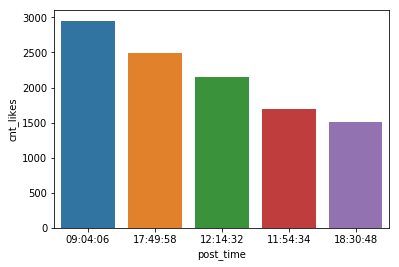

In [19]:
sns.barplot(x='post_time',y='cnt_likes',data=top5)